In [12]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

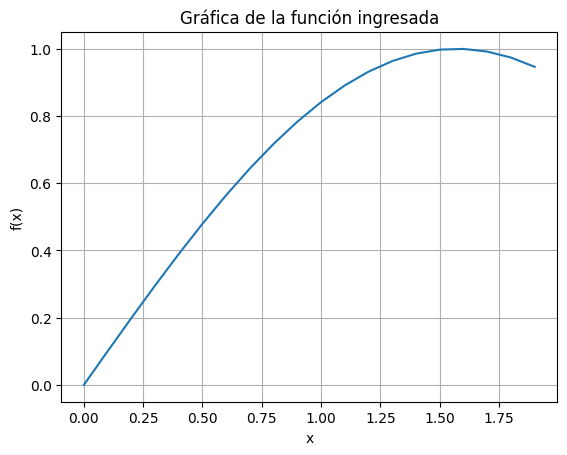

In [13]:
function = "np.sin(x)"#input("Ingrese la función que desea graficar (en formato de Numpy): ")
inicial_point = 0#float(input("Ingrese el punto inicial del intervalo: "))
end_point = 2#float(input("Ingrese el punto final del intervalo: "))
if inicial_point >= end_point:
    print("El punto inicial debe ser menor que el punto final")
    exit()
# Convertir el string function a una sentencia de numpy
x = np.array(np.arange(inicial_point, end_point, 0.1))
y = eval(function)

# Graficar la función
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función ingresada')
plt.grid(True)
plt.show()


In [14]:
def RiemannSum(function , n):
    a = inicial_point
    b = end_point
    dx = (b - a) / n
    #Graficar la suma
    x = np.array(np.arange(inicial_point, end_point, 0.1))
    y = eval(function)
    plt.plot(x, y, 'r')
    plt.bar(x, y, width=dx, alpha=0.5, align='center')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Suma de Riemann')
    plt.grid(True)
    plt.show()
    return np.sum(y * dx)

def LowDSum(function , n):
    a = inicial_point
    b = end_point
    dx = (b - a) / n
    #Graficar la suma
    x = np.linspace(a, b-dx, n)
    y = eval(function)
    plt.plot(x, y, 'r')
    plt.bar(x, y, width=dx, alpha=0.5, align='center')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Suma de Riemann')
    plt.grid(True)
    plt.show()
    return np.sum(y * dx)

def HighDSum(function , n):
    a = inicial_point
    b = end_point
    dx = (b - a) / n
    #Graficar la suma
    x = np.linspace(a, b, n)
    y = eval(function)
    plt.plot(x, y, 'r')
    plt.bar(x, y, width=dx, alpha=0.5, align='center')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Suma de Riemann')
    plt.grid(True)
    plt.show()
    return np.sum(y * dx)



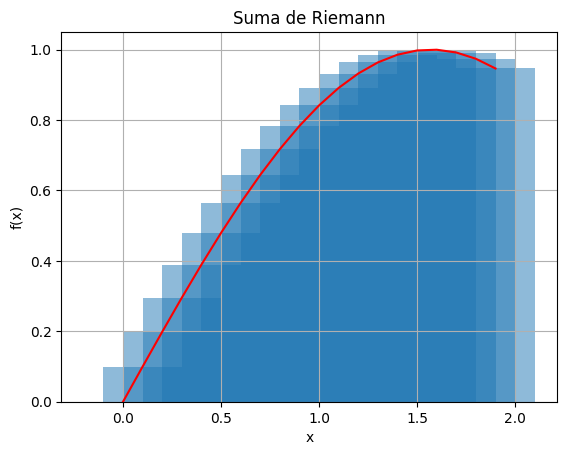

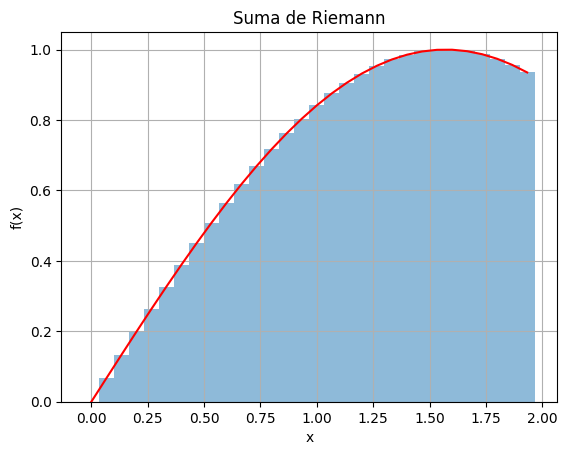

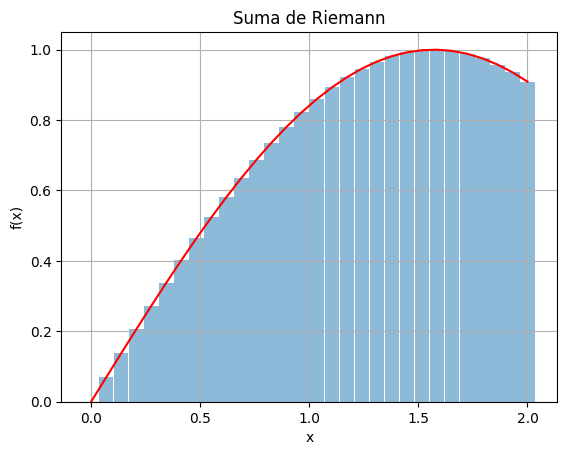

In [15]:
rieman_sum = RiemannSum(function, 5)
lowGSum = LowDSum(function, 30)
highGSum = HighDSum(function, 30)

In [16]:
print(rieman_sum)
print(lowGSum)
print(highGSum)

5.478006584432666
1.3853123846353919
1.3987092282122788


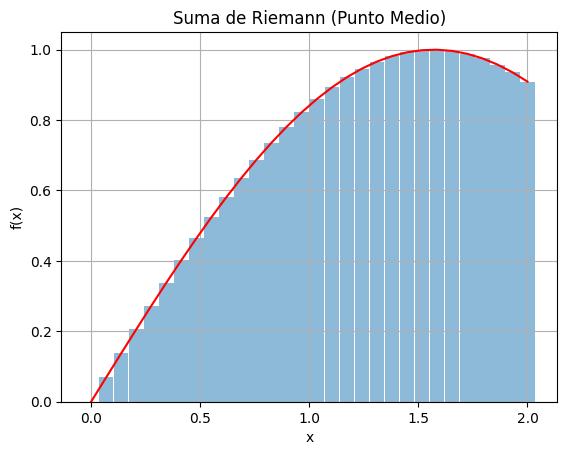

1.3987092282122788


In [17]:
def MidpointRiemannSum(function, n):
    a = inicial_point
    b = end_point
    dx = (b - a) / n
    midpoints = np.linspace(a + dx/2, b - dx/2, n)
    lowpoints = np.linspace(a , b , n)
    y_midpoints = eval(function.replace('x', 'lowpoints'))
    plt.plot(lowpoints, y_midpoints, 'r')
    plt.bar(lowpoints, y_midpoints, width=dx, alpha=0.5, align='center')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Suma de Riemann (Punto Medio)')
    plt.grid(True)
    plt.show()
    return np.sum(y_midpoints * dx)

midpoint_riemann_sum = MidpointRiemannSum(function, 30)
print(midpoint_riemann_sum)

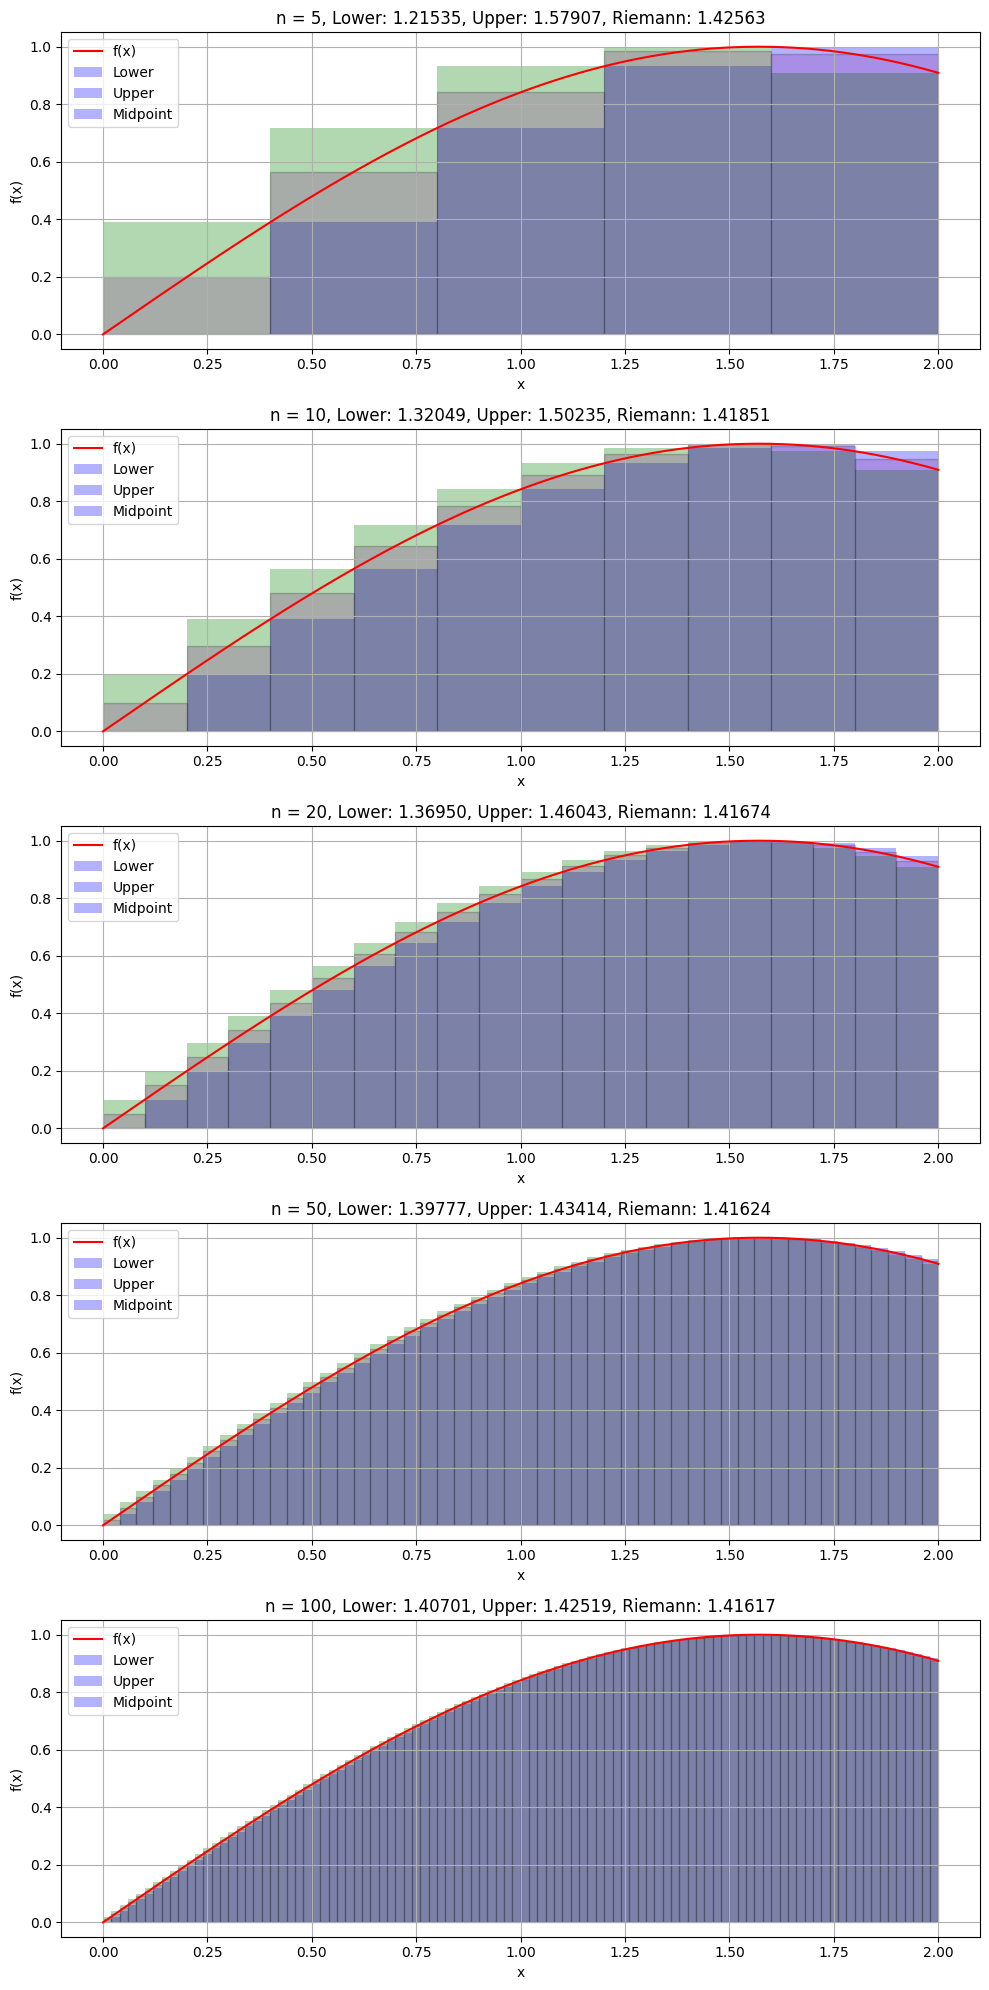

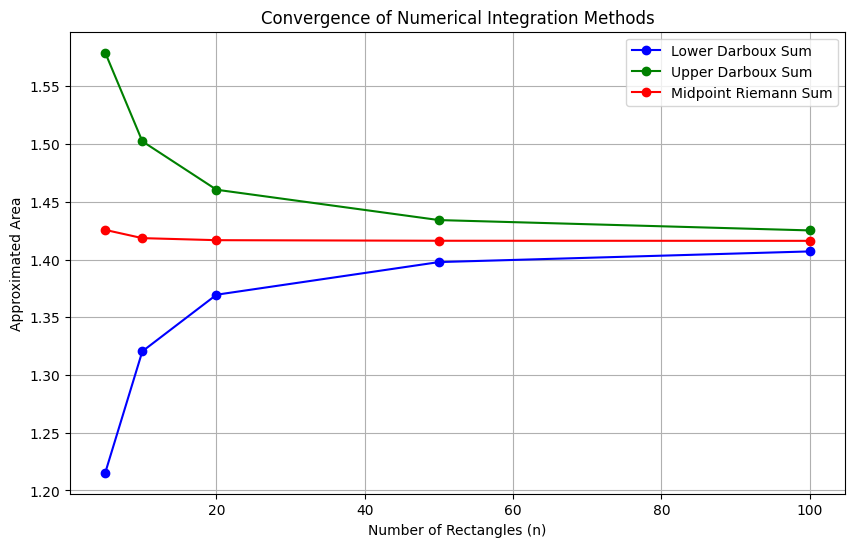

In [18]:
def visualize_riemann_convergence(function_str, n_values=[5, 10, 20, 50 , 100]):
    # Set up the figure with subplots
    fig, axs = plt.subplots(len(n_values), 1, figsize=(10, 4*len(n_values)))
    
    # Create smooth curve for the actual function
    x_smooth = np.linspace(inicial_point, end_point, 1000)
    # Fix: Properly evaluate function with x_smooth
    y_smooth = eval(function_str.replace('x', 'x_smooth'))
    
    # Store results for different n values
    results = {"n": [], "riemann": [], "lower": [], "upper": []}
    
    # Loop through each n value
    for i, n in enumerate(n_values):
        a = inicial_point
        b = end_point
        dx = (b - a) / n
        
        # Calculate points for rectangles
        x_points = np.linspace(a, b, n+1)
        
        # Lower Darboux sum (minimum height in each interval)
        x_lower = np.linspace(a, b-dx, n)
        y_lower = eval(function_str.replace('x', 'x_lower'))
        lower_sum = np.sum(y_lower * dx)
        
        # Upper Darboux sum (maximum height in each interval)
        x_upper = np.linspace(a+dx, b, n)
        y_upper = eval(function_str.replace('x', 'x_upper'))
        upper_sum = np.sum(y_upper * dx)
        
        # Midpoint Riemann sum
        x_mid = np.linspace(a + dx/2, b - dx/2, n)
        y_mid = eval(function_str.replace('x', 'x_mid'))
        mid_sum = np.sum(y_mid * dx)
        
        # Store results
        results["n"].append(n)
        results["riemann"].append(mid_sum)
        results["lower"].append(lower_sum)
        results["upper"].append(upper_sum)
        
        # Plot
        axs[i].plot(x_smooth, y_smooth, 'r-', label='f(x)')
        
        # Plot lower Darboux rectangles
        for j in range(n):
            axs[i].add_patch(plt.Rectangle((x_points[j], 0), dx, y_lower[j], 
                                         facecolor='blue', alpha=0.3))
        
        # Plot upper Darboux rectangles
        for j in range(n):
            axs[i].add_patch(plt.Rectangle((x_points[j], 0), dx, y_upper[j], 
                                         facecolor='green', alpha=0.3))
        
        # Plot midpoint Riemann rectangles
        for j in range(n):
            axs[i].add_patch(plt.Rectangle((x_points[j], 0), dx, y_mid[j], 
                                         facecolor='purple', alpha=0.2, edgecolor='black'))
        
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('f(x)')
        axs[i].set_title(f'n = {n}, Lower: {lower_sum:.5f}, Upper: {upper_sum:.5f}, Riemann: {mid_sum:.5f}')
        axs[i].grid(True)
        axs[i].legend(['f(x)', 'Lower', 'Upper', 'Midpoint'], loc='best')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Visualize convergence for the current function
results = visualize_riemann_convergence(function)

# Create a summary plot showing convergence
plt.figure(figsize=(10, 6))
plt.plot(results["n"], results["lower"], 'b-o', label='Lower Darboux Sum')
plt.plot(results["n"], results["upper"], 'g-o', label='Upper Darboux Sum')
plt.plot(results["n"], results["riemann"], 'r-o', label='Midpoint Riemann Sum')
plt.xlabel('Number of Rectangles (n)')
plt.ylabel('Approximated Area')
plt.title('Convergence of Numerical Integration Methods')
plt.grid(True)
plt.legend()
plt.show()

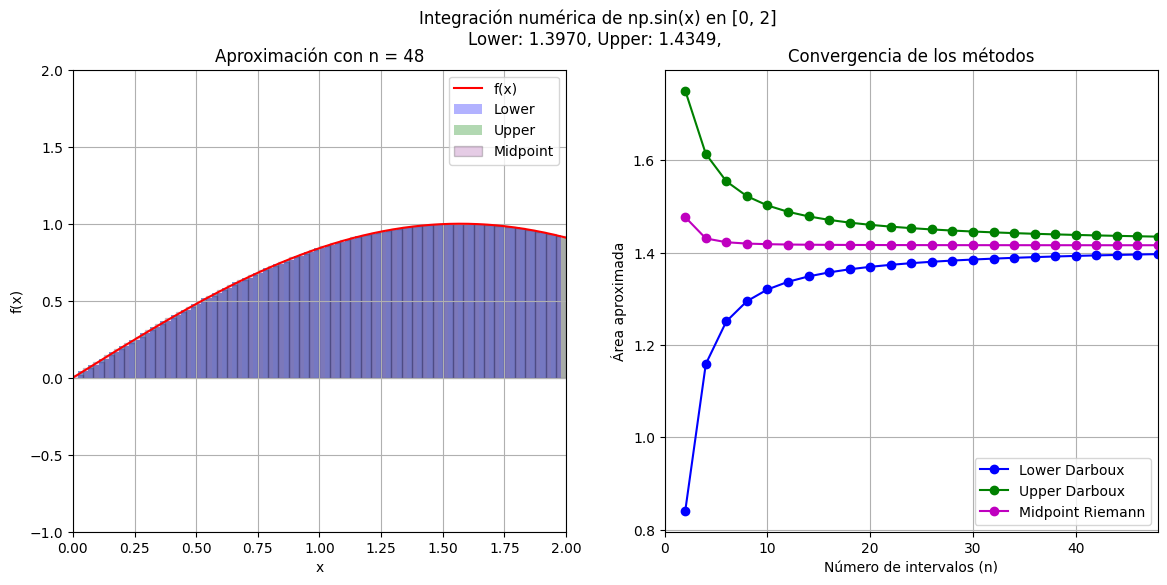

In [19]:
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

import matplotlib.pyplot as plt

# Configurar la figura para la animación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Función para calcular los diferentes métodos de integración numérica
def calculate_integration(n):
    a = inicial_point
    b = end_point
    dx = (b - a) / n
    
    # Calcular puntos para los rectangulos
    x_smooth = np.linspace(a, b, 1000)
    y_smooth = eval(function.replace('x', 'x_smooth'))
    
    # Lower Darboux sum
    x_lower = np.linspace(a, b-dx, n)
    y_lower = eval(function.replace('x', 'x_lower'))
    lower_sum = np.sum(y_lower * dx)
    
    # Upper Darboux sum
    x_upper = np.linspace(a+dx, b, n)
    y_upper = eval(function.replace('x', 'x_upper'))
    upper_sum = np.sum(y_upper * dx)
    
    # Midpoint Riemann sum
    x_mid = np.linspace(a + dx/2, b - dx/2, n)
    y_mid = eval(function.replace('x', 'x_mid'))
    mid_sum = np.sum(y_mid * dx)
    
    return {
        'x_smooth': x_smooth,
        'y_smooth': y_smooth,
        'x_lower': x_lower,
        'y_lower': y_lower,
        'x_upper': x_upper,
        'y_upper': y_upper,
        'x_mid': x_mid,
        'y_mid': y_mid,
        'lower_sum': lower_sum,
        'upper_sum': upper_sum,
        'mid_sum': mid_sum,
        'dx': dx
    }

# Valores de n para la animación (incrementando)
n_values = list(range(2, 50, 2))
n_history = []
lower_history = []
upper_history = []
mid_history = []

# Función de inicialización para la animación
def init():
    ax1.clear()
    ax2.clear()
    return []

# Función de animación
def animate(i):
    ax1.clear()
    ax2.clear()
    
    n = n_values[i]
    result = calculate_integration(n)
    
    # Gráfico de la función original
    ax1.plot(result['x_smooth'], result['y_smooth'], 'r-', label='f(x)')
    
    # Dibujar los rectángulos
    for j in range(n):
        # Lower Darboux
        x_start = result['x_lower'][j] - result['dx']/2
        ax1.add_patch(plt.Rectangle((x_start, 0), result['dx'], result['y_lower'][j], 
                                 facecolor='blue', alpha=0.3))
        
        # Upper Darboux
        x_start = result['x_upper'][j] - result['dx']/2
        ax1.add_patch(plt.Rectangle((x_start, 0), result['dx'], result['y_upper'][j], 
                                 facecolor='green', alpha=0.3))
        
        # Midpoint Riemann
        x_start = result['x_mid'][j] - result['dx']/2
        ax1.add_patch(plt.Rectangle((x_start, 0), result['dx'], result['y_mid'][j], 
                                 facecolor='purple', alpha=0.2, edgecolor='black'))
    
    # Configurar el gráfico de la función
    ax1.set_xlim(inicial_point, end_point)
    ax1.set_ylim(min(-1, min(result['y_smooth'])), max(2, max(result['y_smooth'])))
    ax1.set_title(f'Aproximación con n = {n}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.grid(True)
    
    # Almacenar los resultados históricos
    n_history.append(n)
    lower_history.append(result['lower_sum'])
    upper_history.append(result['upper_sum'])
    mid_history.append(result['mid_sum'])
    
    # Graficar la convergencia
    ax2.plot(n_history, lower_history, 'bo-', label='Lower Darboux')
    ax2.plot(n_history, upper_history, 'go-', label='Upper Darboux')
    ax2.plot(n_history, mid_history, 'mo-', label='Midpoint Riemann')
    # ax2.axhline(y=exact_value, color='r', linestyle='-', label='Valor exacto')
    
    ax2.set_title('Convergencia de los métodos')
    ax2.set_xlabel('Número de intervalos (n)')
    ax2.set_ylabel('Área aproximada')
    ax2.set_xlim(0, max(n_values))
    ax2.grid(True)
    
    # Añadir leyenda y valores en el título
    ax1.legend(['f(x)', 'Lower', 'Upper', 'Midpoint'], loc='upper right')
    ax2.legend(loc='lower right')
    
    fig.suptitle(f'Integración numérica de {function} en [{inicial_point}, {end_point}]\n'
                f'Lower: {result["lower_sum"]:.4f}, Upper: {result["upper_sum"]:.4f}, '
                # f'Midpoint: {result["mid_sum"]:.4f}, Exact: {exact_value:.4f}')\
    )
    
    return []

# Crear la animación
anim = FuncAnimation(fig, animate, frames=len(n_values), init_func=init, interval=300, blit=True)

# Mostrar la animación
HTML(anim.to_jshtml())

In [ ]:
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

import matplotlib.pyplot as plt

# Configurar la figura para la animación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Función para calcular los diferentes métodos de integración numérica
def calculate_integration(n):
    a = inicial_point
    b = end_point
    dx = (b - a) / n
    
    # Calcular puntos para los rectangulos
    x_smooth = np.linspace(a, b, 1000)
    y_smooth = eval(function.replace('x', 'x_smooth'))
    
    # Lower Darboux sum
    x_lower = np.linspace(a, b-dx, n)
    y_lower = eval(function.replace('x', 'x_lower'))
    lower_sum = np.sum(y_lower * dx)
    
    # Upper Darboux sum
    x_upper = np.linspace(a+dx, b, n)
    y_upper = eval(function.replace('x', 'x_upper'))
    upper_sum = np.sum(y_upper * dx)
    
    # Midpoint Riemann sum
    x_mid = np.linspace(a + dx/2, b - dx/2, n)
    y_mid = eval(function.replace('x', 'x_mid'))
    mid_sum = np.sum(y_mid * dx)
    
    return {
        'x_smooth': x_smooth,
        'y_smooth': y_smooth,
        'x_lower': x_lower,
        'y_lower': y_lower,
        'x_upper': x_upper,
        'y_upper': y_upper,
        'x_mid': x_mid,
        'y_mid': y_mid,
        'lower_sum': lower_sum,
        'upper_sum': upper_sum,
        'mid_sum': mid_sum,
        'dx': dx
    }

# Valores de n para la animación (incrementando)
n_values = list(range(2, 50, 2))
n_history = []
lower_history = []
upper_history = []
mid_history = []

# Función de inicialización para la animación
def init():
    ax1.clear()
    ax2.clear()
    return []

# Función de animación
def animate(i):
    ax1.clear()
    ax2.clear()
    
    n = n_values[i]
    result = calculate_integration(n)
    
    # Gráfico de la función original
    ax1.plot(result['x_smooth'], result['y_smooth'], 'r-', label='f(x)')
    
    # Dibujar los rectángulos
    for j in range(n):
        # Lower Darboux
        x_start = result['x_lower'][j] - result['dx']/2
        ax1.add_patch(plt.Rectangle((x_start, 0), result['dx'], result['y_lower'][j], 
                                 facecolor='blue', alpha=0.3))
        
        # Upper Darboux
        x_start = result['x_upper'][j] - result['dx']/2
        ax1.add_patch(plt.Rectangle((x_start, 0), result['dx'], result['y_upper'][j], 
                                 facecolor='green', alpha=0.3))
        
        # Midpoint Riemann
        x_start = result['x_mid'][j] - result['dx']/2
        ax1.add_patch(plt.Rectangle((x_start, 0), result['dx'], result['y_mid'][j], 
                                 facecolor='purple', alpha=0.2, edgecolor='black'))
    
    # Configurar el gráfico de la función
    ax1.set_xlim(inicial_point, end_point)
    ax1.set_ylim(min(-1, min(result['y_smooth'])), max(2, max(result['y_smooth'])))
    ax1.set_title(f'Aproximación con n = {n}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.grid(True)
    
    # Almacenar los resultados históricos
    n_history.append(n)
    lower_history.append(result['lower_sum'])
    upper_history.append(result['upper_sum'])
    mid_history.append(result['mid_sum'])
    
    # Graficar la convergencia
    ax2.plot(n_history, lower_history, 'bo-', label='Lower Darboux')
    ax2.plot(n_history, upper_history, 'go-', label='Upper Darboux')
    ax2.plot(n_history, mid_history, 'mo-', label='Midpoint Riemann')
    # ax2.axhline(y=exact_value, color='r', linestyle='-', label='Valor exacto')
    
    ax2.set_title('Convergencia de los métodos')
    ax2.set_xlabel('Número de intervalos (n)')
    ax2.set_ylabel('Área aproximada')
    ax2.set_xlim(0, max(n_values))
    ax2.grid(True)
    
    # Añadir leyenda y valores en el título
    ax1.legend(['f(x)', 'Lower', 'Upper', 'Midpoint'], loc='upper right')
    ax2.legend(loc='lower right')
    
    fig.suptitle(f'Integración numérica de {function} en [{inicial_point}, {end_point}]\n'
                f'Lower: {result["lower_sum"]:.4f}, Upper: {result["upper_sum"]:.4f}, '
                # f'Midpoint: {result["mid_sum"]:.4f}, Exact: {exact_value:.4f}')\
    )
    
    return []

# Crear la animación
anim = FuncAnimation(fig, animate, frames=len(n_values), init_func=init, interval=300, blit=True)

# Mostrar la animación
HTML(anim.to_jshtml())

In [ ]:
# np.linspace(start, stop, num): Genera un número especificado de puntos equidistantes entre start y stop.
# np.arange(start, stop, step): Genera una secuencia de valores con un intervalo especificado entre start y stop.
# np.sin(x): Calcula el seno de cada elemento en el array x.
# np.cos(x): Calcula el coseno de cada elemento en el array x.
# np.tan(x): Calcula la tangente de cada elemento en el array x.
# np.exp(x): Calcula la exponencial de cada elemento en el array x.
# np.log(x): Calcula el logaritmo natural de cada elemento en el array x.
# np.sqrt(x): Calcula la raíz cuadrada de cada elemento en el array x.
# np.power(x, y): Eleva cada elemento en el array x a la potencia y.
# np.random.rand(d0, d1, ..., dn): Genera un array de dimensiones especificadas con valores aleatorios entre 0 y 1.
# np.random.randn(d0, d1, ..., dn): Genera un array de dimensiones especificadas con valores aleatorios de una distribución normal estándar.
# np.random.randint(low, high, size): Genera un array de tamaño especificado con valores enteros aleatorios entre low y high.